In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

import torch
from IPython.display import Image


import torchvision.transforms as T
from torchvision.transforms import transforms
from torch.utils.data import TensorDataset
from torchvision.utils import make_grid
from PIL import Image


%pip install git+https://github.com/mwalmsley/galaxy_mnist.git
from galaxy_mnist import GalaxyMNIST


  Cloning https://github.com/mwalmsley/galaxy_mnist.git to c:\users\admin\appdata\local\temp\pip-req-build-a0swz2k8
  Resolved https://github.com/mwalmsley/galaxy_mnist.git to commit 375e0257bfd41acbcb7ba2e0f33c8c04d0d5beef
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/mwalmsley/galaxy_mnist.git 'C:\Users\Admin\AppData\Local\Temp\pip-req-build-a0swz2k8'


In [2]:
dataset = GalaxyMNIST(
    root='/galaxy_mnist_download',  #change root with the desire folder
    download=True,
    train=True
)

testset = GalaxyMNIST(
    root='/galaxy_mnist_download',  #change root with the desire folder
    download=True,
    train=False
)

In [3]:
#display catalogue specifics

display(dataset)
display(testset)
images = dataset.data

Dataset GalaxyMNIST
    Number of datapoints: 8000
    Root location: /galaxy_mnist_download
    Split: Train

Dataset GalaxyMNIST
    Number of datapoints: 2000
    Root location: /galaxy_mnist_download
    Split: Test

In [4]:
#Display a specific galaxy

obj_number = 84 #change this to show different galaxies
trans = T.ToPILImage()

img = trans(images[obj_number])

img.show()

In [5]:
def visualize_generator(image,transform):
    '''Given an image perform a specific transformation'''
    
    #load the requested image
    trans = T.ToPILImage()
    img = trans(image)
    
    #Apply transformation
    imgs = [transform(img) for _ in range(4)]
    imgs = torch.stack(imgs)
    
    #Display the augmented images in a grid format
    grid = make_grid(imgs, nrow=2)
    
    #convert to numpy for plotting
    grid_np = grid.numpy().transpose(1, 2, 0)
    grid_np = (grid_np * 255).astype(np.uint8)
    
    plt.figure(figsize = (15, 15))
    plt.axis("off")
    plt.imshow(grid_np)
    plt.show()

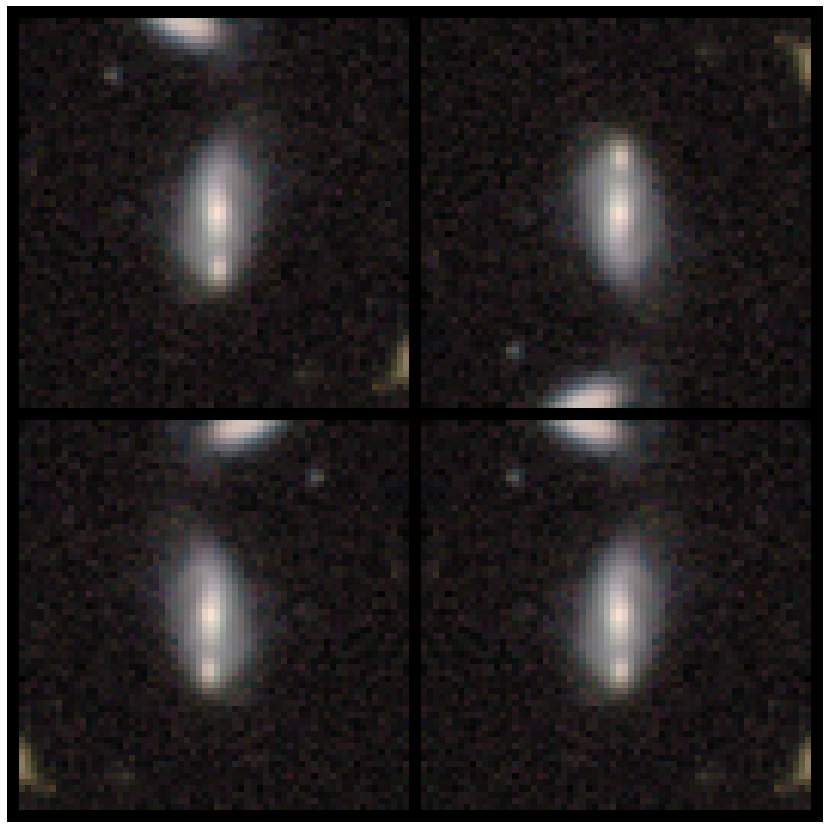

In [6]:
#transform the images with a random flip
LOCAL_IMG_FILE = (images[obj_number])

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor()
])
visualize_generator(LOCAL_IMG_FILE, transform)

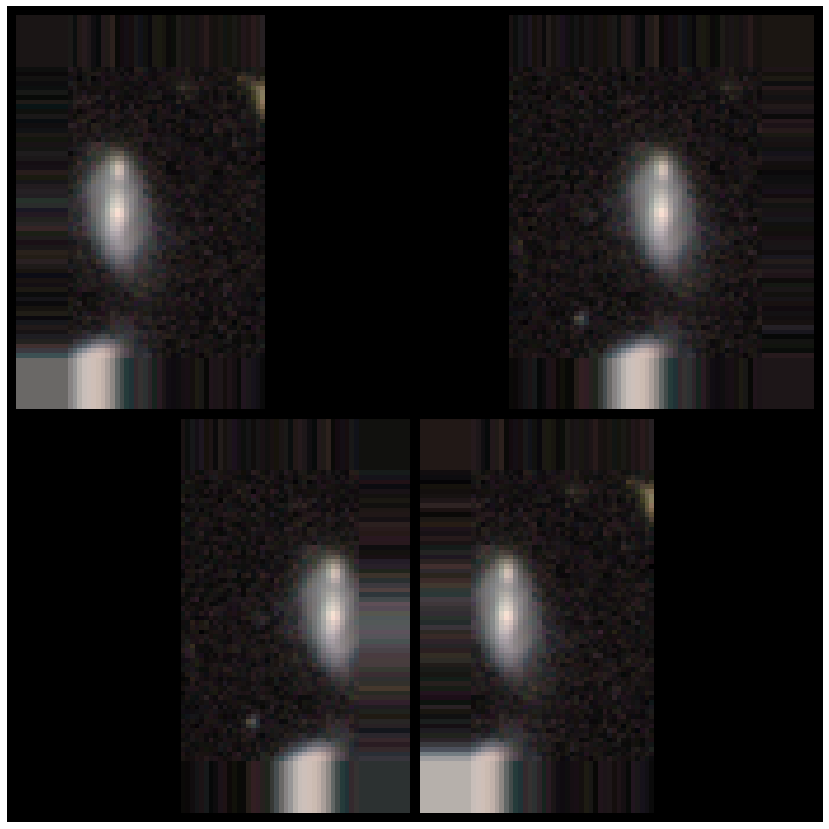

In [7]:
#transform the images with a padding

LOCAL_IMG_FILE = (images[obj_number])
transform = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.5,0)),
    transforms.Pad(padding=10, fill=0, padding_mode="edge"),
    transforms.ToTensor()
])
visualize_generator(LOCAL_IMG_FILE, transform)

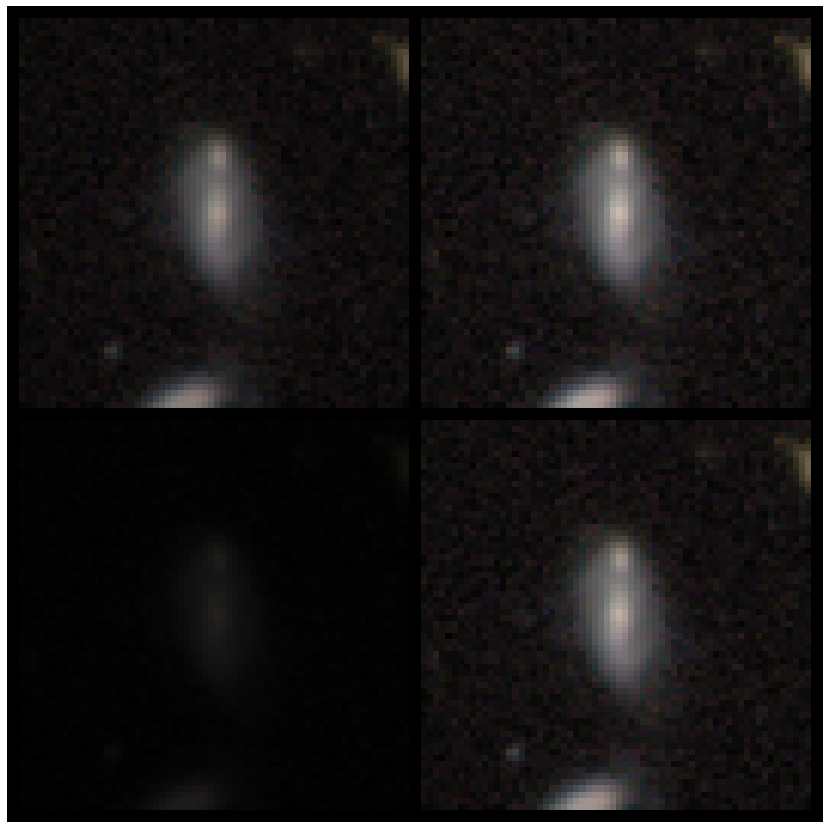

In [8]:
#transform the images with a change in brightness

LOCAL_IMG_FILE = (images[obj_number])
transform = transforms.Compose([
    transforms.ColorJitter(brightness=(0,1)),
    transforms.ToTensor()
])
visualize_generator(LOCAL_IMG_FILE, transform)


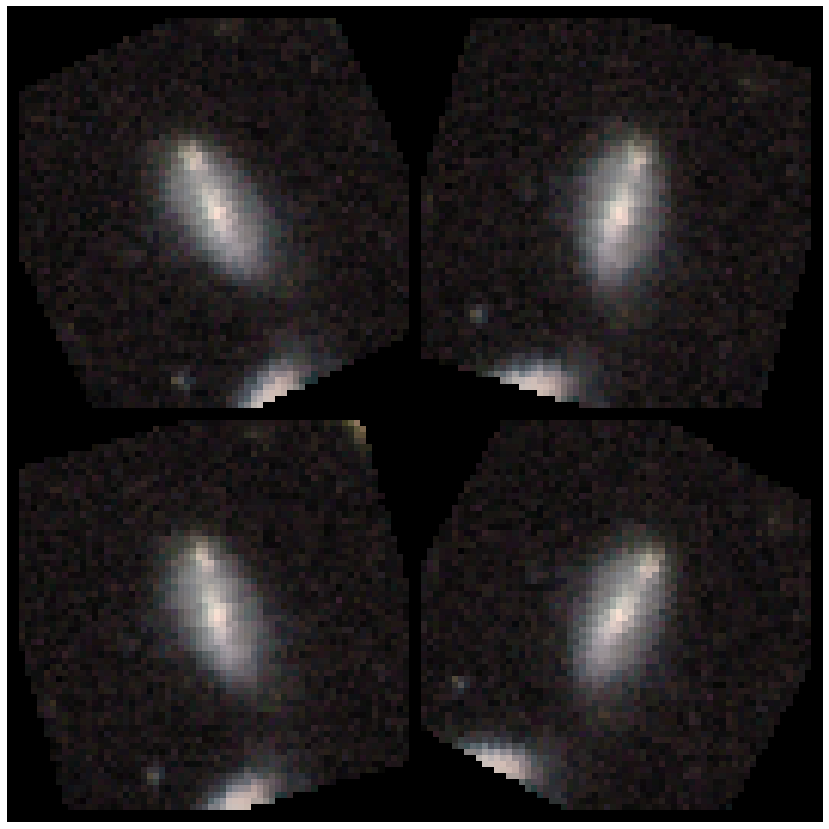

In [9]:
#transform the images with a rotation

rotation = 30 #change this parameter for a different rotation (in degrees)

LOCAL_IMG_FILE = (images[obj_number])
transform = transforms.Compose([
    transforms.RandomAffine(degrees = rotation),
     transforms.ToTensor()
])
visualize_generator(LOCAL_IMG_FILE, transform)

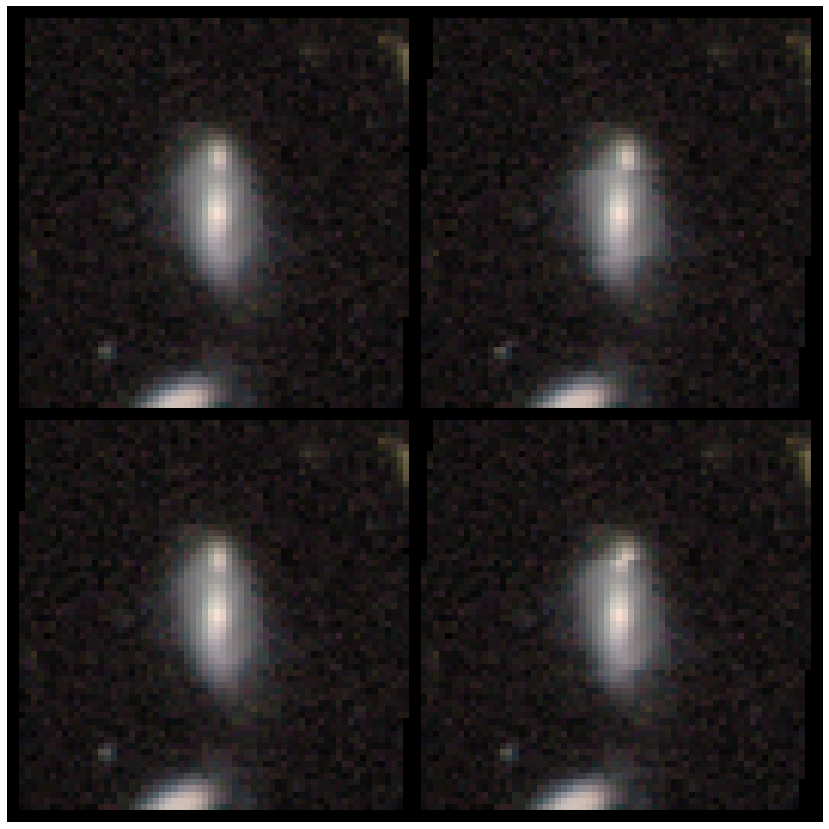

In [10]:
#transform the images with a shear

stretch = 5 #change this parameter for a different shear value

LOCAL_IMG_FILE = (images[obj_number])
transform = transforms.Compose([
    transforms.RandomAffine(degrees=0, shear = stretch),
     transforms.ToTensor()
])
visualize_generator(LOCAL_IMG_FILE, transform)